In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import vmlab
from vmlab.models import vmango

In [2]:
tree = pd.read_csv('../../share/trees/tree_B10_cycle_030405.csv')

In [6]:
setup = vmlab.create_setup(
    model=vmango,
    tree=tree,
    start_date='2003-06-01',
    end_date='2005-06-01',
    setup_toml='../../share/setup/vmango.toml',
    current_cycle=3,
    input_vars={
        'geometry__interpretation_freq': 0
    },
    output_vars={
        'fruit_quality': {
            'FM_fruit': 'day'
        },
        'carbon_balance': {
            'DM_fruit': 'day'
        }
    }
)

In [7]:
ds_out = vmlab.run(setup, vmango)

             0% | initialize 

In [43]:
# select variables, the date range that is important, rename variables
ds = ds_out[['fruit_quality__FM_fruit', 'carbon_balance__DM_fruit']].sel({
        'day': slice('2004-11-01', '2005-03-01')
    }).where(ds_out.carbon_balance__DM_fruit > 0, drop=True).rename_vars({
        'fruit_quality__FM_fruit': 'FM',
        'carbon_balance__DM_fruit': 'DM',
    })
ds

<xarray.Dataset>
Dimensions:  (GU: 87, day: 107)
Coordinates:
  * day      (day) datetime64[ns] 2004-11-15 2004-11-16 ... 2005-03-01
  * GU       (GU) <U10 'GU472' 'GU473' 'GU476' ... 'GU702' 'GU704' 'GU707'
Data variables:
    FM       (day, GU) float64 nan nan nan nan nan ... 311.9 327.9 360.8 434.4
    DM       (day, GU) float32 nan nan nan nan nan ... 65.1 71.25 81.53 89.56

In [45]:
# move variables and their values into one column so it is useable for seaborn facegrids
df = pd.melt(ds.to_dataframe().reset_index(), id_vars=['GU', 'day'], value_vars=['FM', 'DM'], var_name='vars', value_name='gram')
df

,GU,day,vars,gram
0,GU472,2004-11-15,FM,NaN
1,GU472,2004-11-16,FM,NaN
2,GU472,2004-11-17,FM,NaN
3,GU472,2004-11-18,FM,NaN
4,GU472,2004-11-19,FM,NaN
...,...,...,...,...
18613,GU707,2005-02-25,DM,89.540733
18614,GU707,2005-02-26,DM,89.600128
18615,GU707,2005-02-27,DM,89.655479
18616,GU707,2005-02-28,DM,89.672981


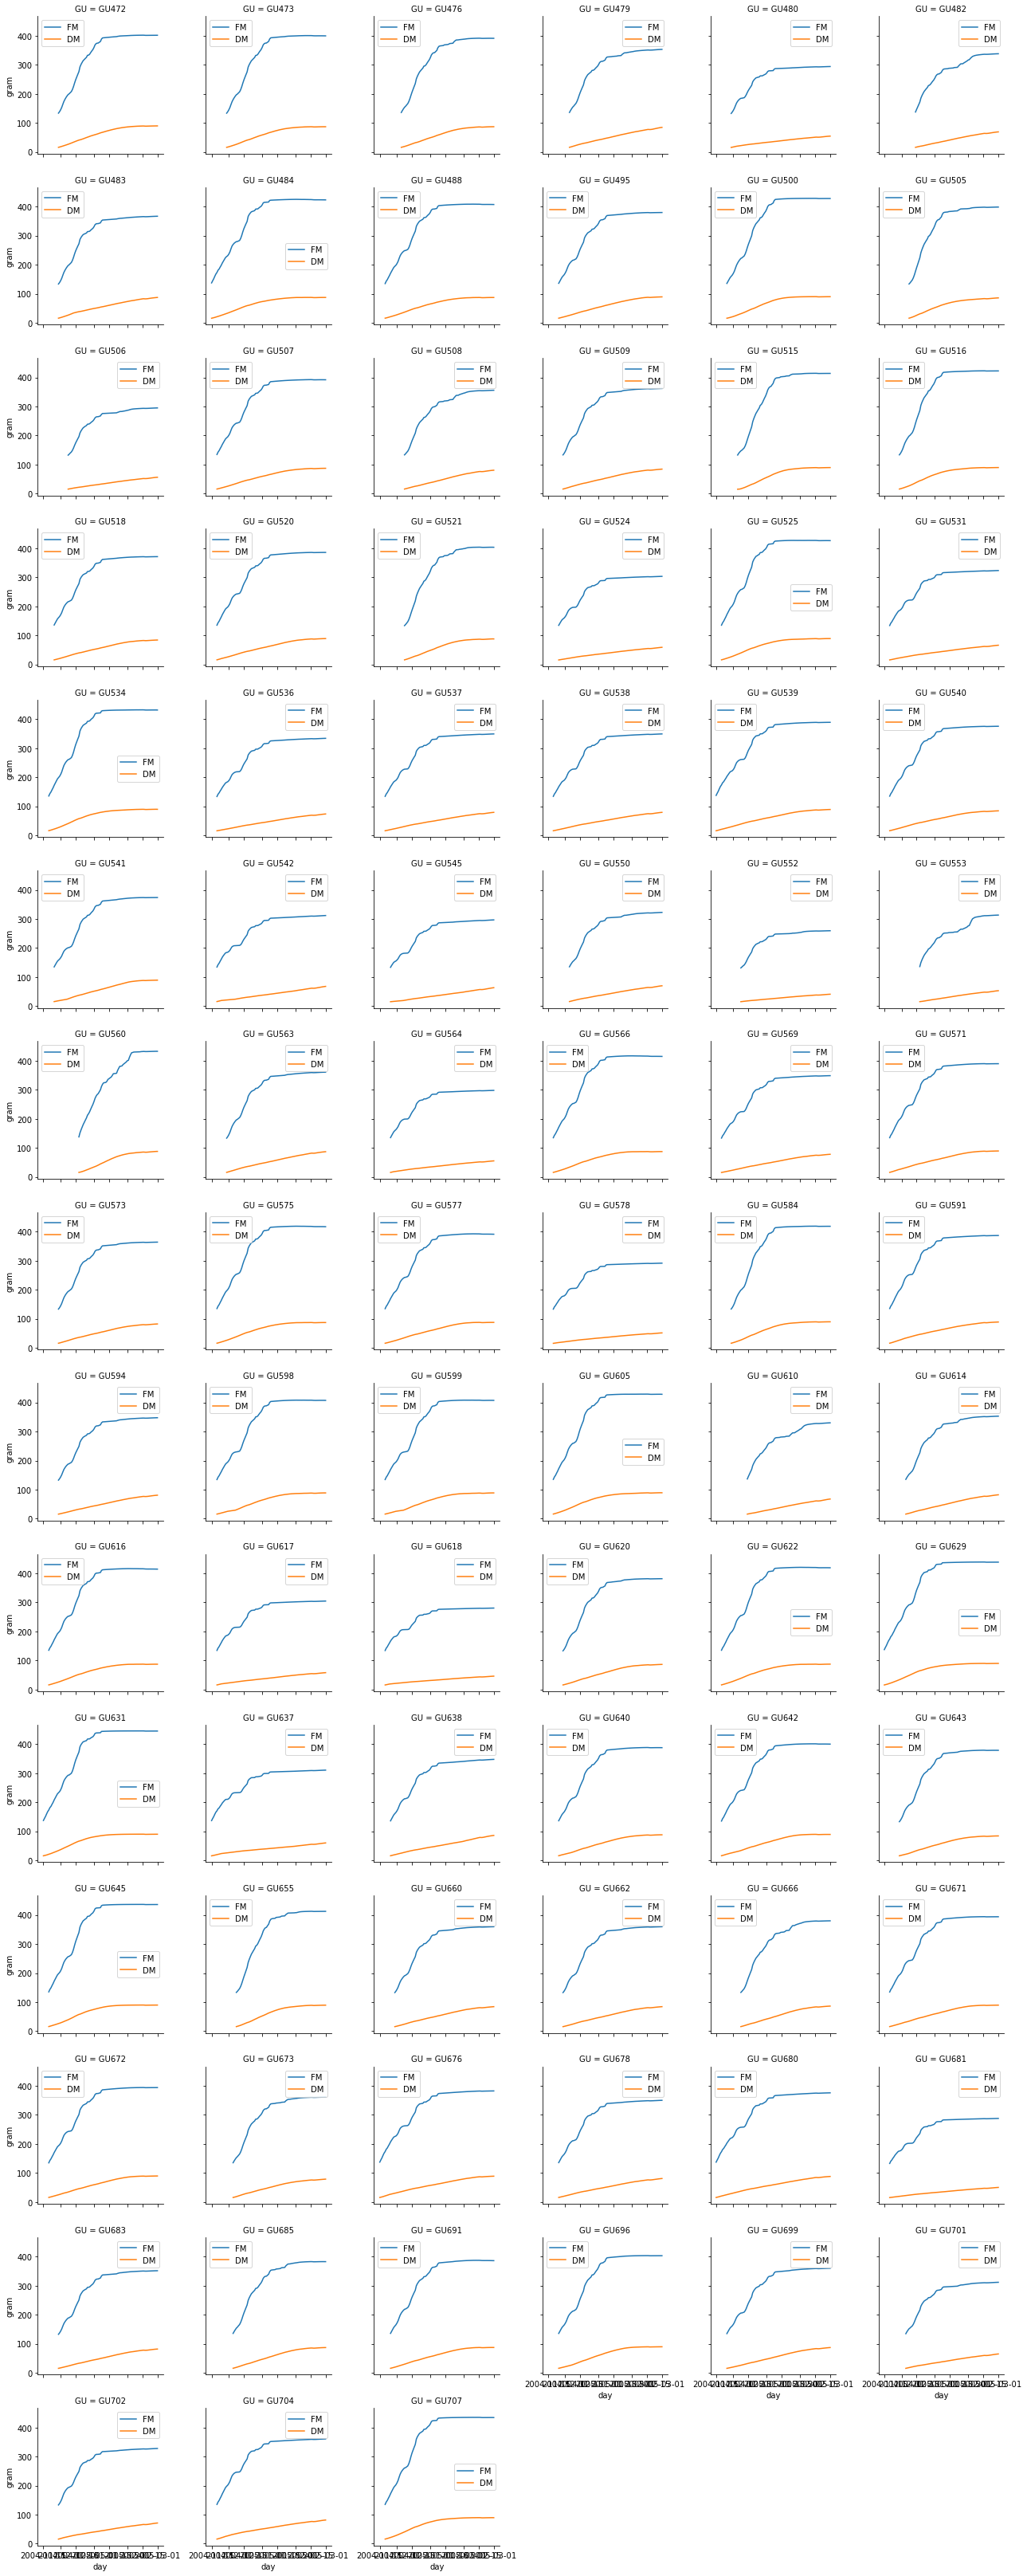

In [46]:
grid = sns.FacetGrid(df, col='GU', hue='vars', col_wrap=6)
grid.map(sns.lineplot, 'day', 'gram')
for ax in grid.axes.ravel():
    ax.legend()